importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading the dataset

In [ ]:
data = pd.read_csv("/content/seattle-weather.csv")

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


printing the columns

In [ ]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

printing no.of rows

In [ ]:
len(data.index)

1461

data visuvalization

In [ ]:
classes = data["weather"].unique()
count = []
for i in classes:
  count.append(list(data["weather"]).count(i))

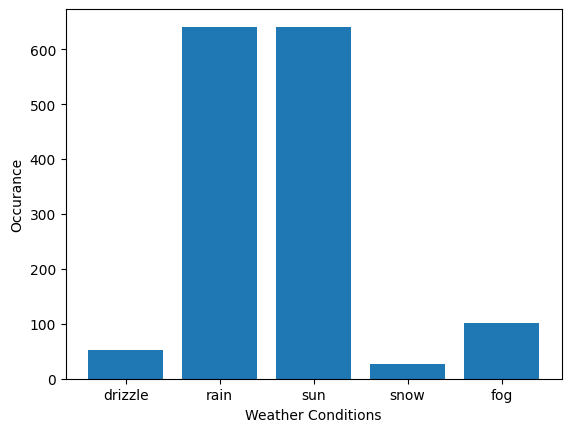

In [ ]:
plt.bar(classes, count)
plt.xlabel("Weather Conditions")
plt.ylabel("Occurance")
plt.show()

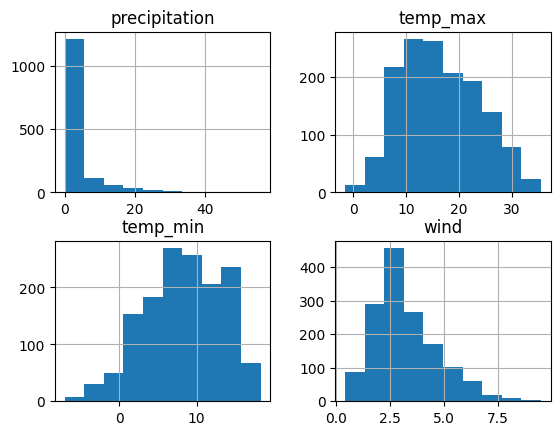

In [ ]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

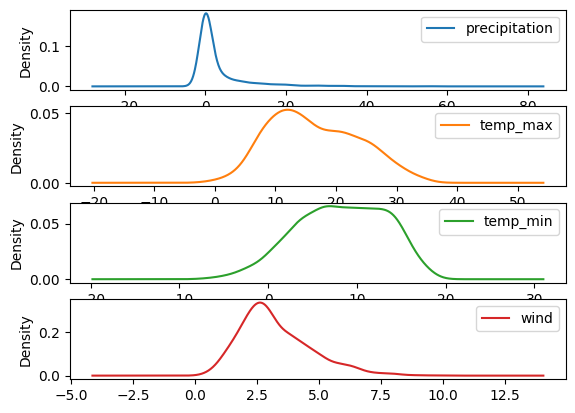

In [ ]:
data.plot(kind='density',subplots=True,sharex=False)
plt.show()

<ipython-input-12-69366283eef1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth =2)


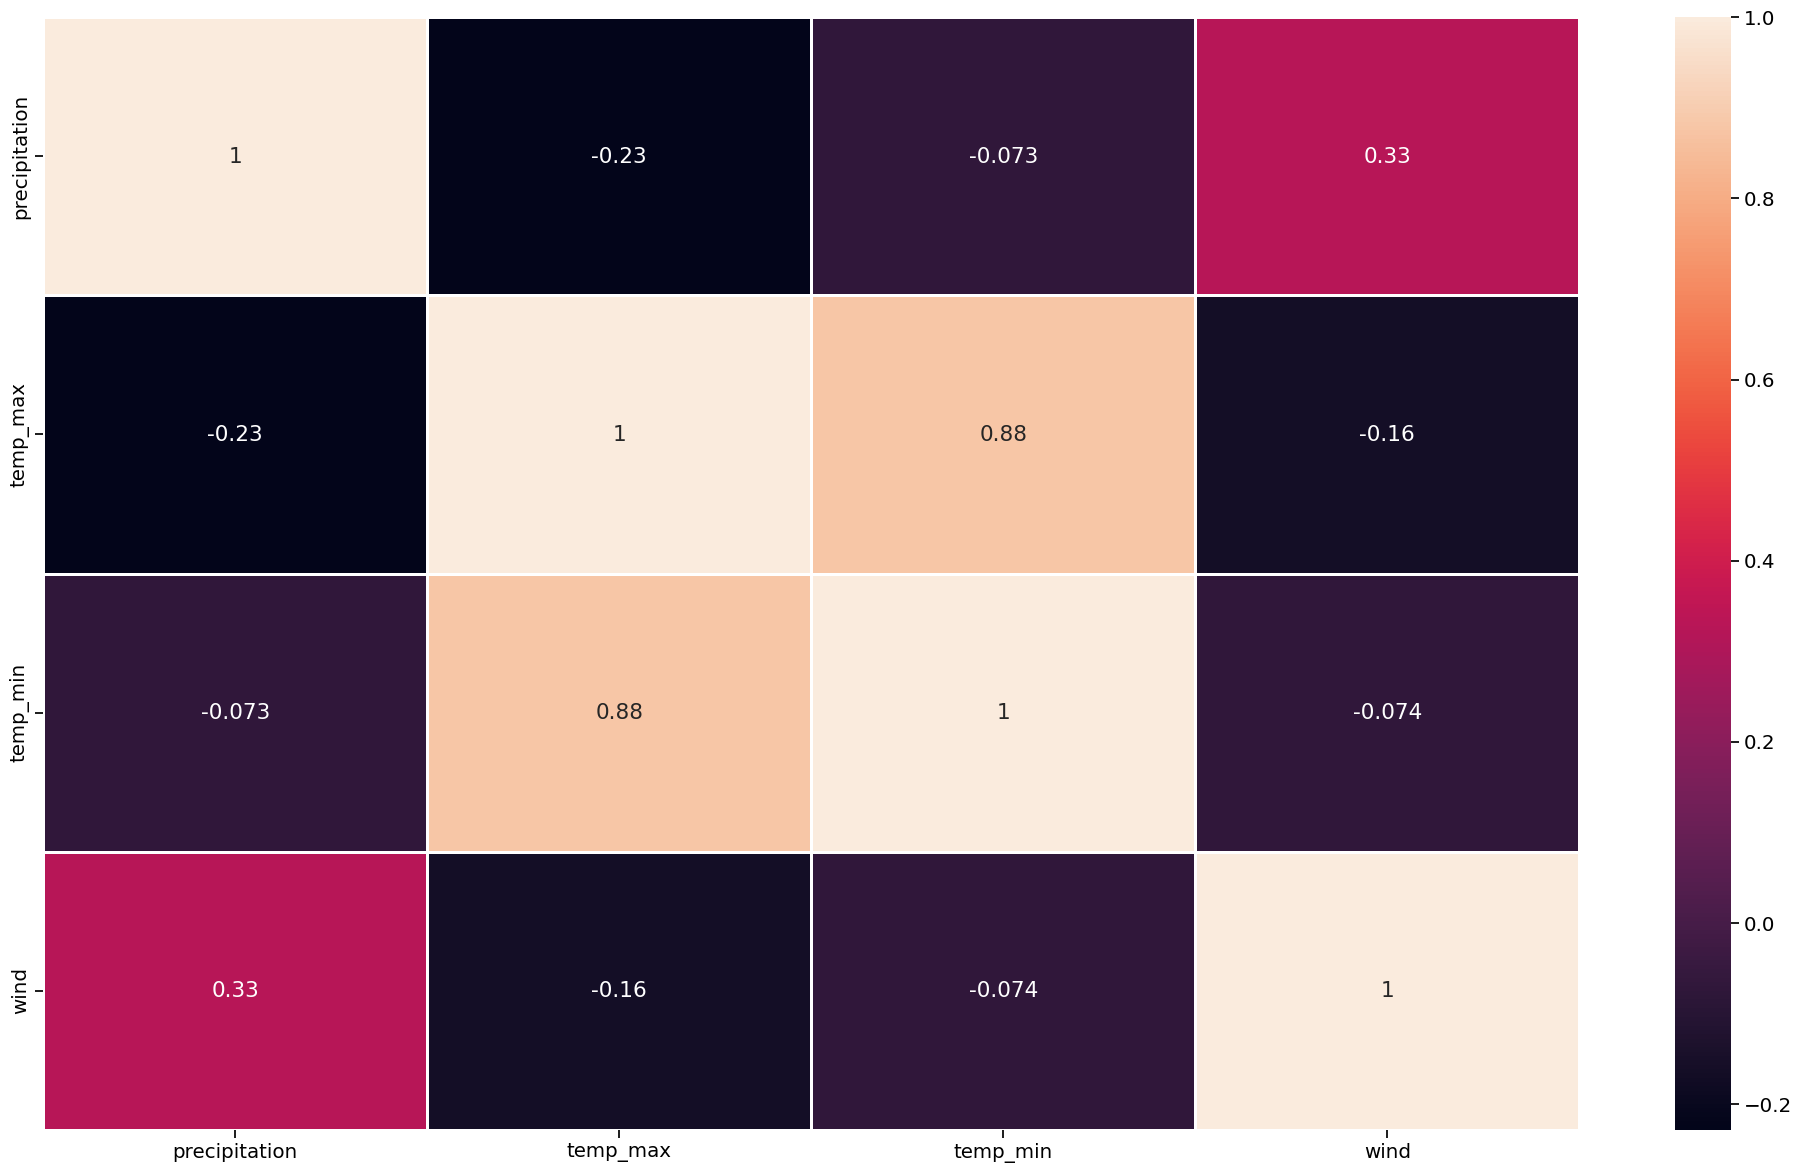

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

trasforming the date column into three different columns named year, month, day.

In [ ]:
date = data.iloc[:,:1]
year = []
day = []
month = []
for i in range(0, 1461):
  temp = data["date"][i].split("-")
  year.append(int(temp[0]))
  month.append(int(temp[1]))
  day.append(int(temp[2]))
print(year[:5])
print(month[:5])
print(day[:5])


[2012, 2012, 2012, 2012, 2012]
[1, 1, 1, 1, 1]
[1, 2, 3, 4, 5]


deleting the date column

In [ ]:
data.drop("date", axis = 1, inplace = True)

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


adding these new columns to the dataset

In [ ]:
data["Year"] = year
data["Month"] = month

In [ ]:
data["Day"] = day

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


In [ ]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Year',
       'Month', 'Day'],
      dtype='object')

separating the independent and dependent varibles

In [ ]:
X = data.drop("weather", axis = 1)
y = data["weather"].values

In [ ]:
print(X[:5])
print(y[:5])

   precipitation  temp_max  temp_min  wind  Year  Month  Day
0            0.0      12.8       5.0   4.7  2012      1    1
1           10.9      10.6       2.8   4.5  2012      1    2
2            0.8      11.7       7.2   2.3  2012      1    3
3           20.3      12.2       5.6   4.7  2012      1    4
4            1.3       8.9       2.8   6.1  2012      1    5
['drizzle' 'rain' 'rain' 'rain' 'rain']


In [ ]:
unq = data["weather"].unique()

performing labelencoding and standardization on the dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
le = LabelEncoder()
y = le.fit_transform(y)
X = sc.fit_transform(X)
print(X[:5])
print(y[:5])

[[-0.45364986 -0.49529914 -0.64421175  1.01497975 -1.34035613 -1.6014511
  -1.67380491]
 [ 1.17859791 -0.79473121 -1.08234662  0.87583314 -1.34035613 -1.6014511
  -1.56016973]
 [-0.33385186 -0.64501518 -0.20607688 -0.65477956 -1.34035613 -1.6014511
  -1.44653456]
 [ 2.58622442 -0.57696243 -0.52472042  1.01497975 -1.34035613 -1.6014511
  -1.33289938]
 [-0.2589781  -1.02611054 -1.08234662  1.98900601 -1.34035613 -1.6014511
  -1.21926421]]
[0 2 2 2 2]


maping the encoded values with respective classes

In [ ]:
map = le.fit_transform(unq)
mapping = pd.DataFrame({"Class":unq})
mapping["Encoded value"] = map

In [ ]:
mapping.head()

,Class,Encoded value
0,drizzle,0
1,rain,2
2,sun,4
3,snow,3
4,fog,1


spliting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

training the randomforest model on the dataset and predicting the testing data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

evalating the performance of the model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
cr = classification_report(y_test, y_predict, target_names = mapping["Class"])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix

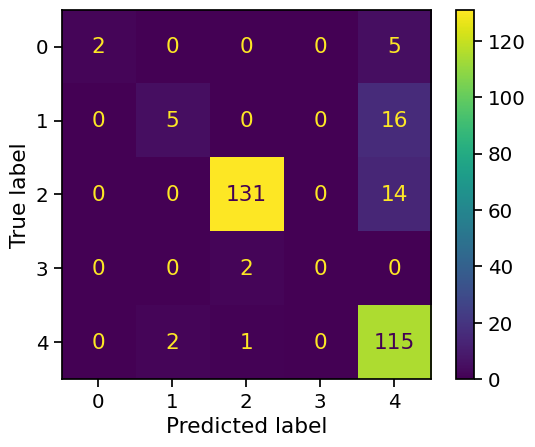

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

accracy of the model

In [ ]:
print("Accuracy of the model : ", acc*100, "%")

Accuracy of the model :  86.3481228668942 %


In [ ]:
print(cr)

              precision    recall  f1-score   support

     drizzle       1.00      0.29      0.44         7
        rain       0.71      0.24      0.36        21
         sun       0.98      0.90      0.94       145
        snow       0.00      0.00      0.00         2
         fog       0.77      0.97      0.86       118

    accuracy                           0.86       293
   macro avg       0.69      0.48      0.52       293
weighted avg       0.87      0.86      0.85       293

